<a href="https://colab.research.google.com/github/gmldud/what_I_did_by_myself/blob/main/project2_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Google Merchandise Sale Prediction**
## Can we predict if a visitor, in a session, will add item(s) to the cart?

```
fullVisitorId: - 고유 방문자 ID입니다.
visitStartTime: - 타임스탬프(POSIX 시간으로 표시).
date: - 세션 날짜.
deviceCategory: - 장치 유형(모바일, 태블릿, 데스크톱).
isMobile: - 사용자가 모바일 장치를 사용하는 경우 이 값은 true이고 그렇지 않으면 false입니다.
operatingSystem: - 장치의 운영 체제(예: "Macintosh" 또는 "Windows").
browser: - 사용된 브라우저(예: "Chrome" 또는 "Firefox").
country: - IP 주소를 기반으로 세션이 시작된 국가.
city: - IP 주소 또는 지리적 ID에서 파생된 사용자의 도시
trafficSource: - 트래픽 소스의 소스입니다. 검색 엔진의 이름, 참조하는 호스트 이름 또는 utm_source URL 매개변수의 값일 수 있습니다.
trafficMedium: - 트래픽 소스의 매체입니다. "organic", "cpc", "referral" 또는 utm_medium URL 매개변수의 값일 수 있습니다.
trafficCampaign: - 캠페인 값입니다. 일반적으로 utm_campaign URL 매개변수로 설정됩니다.
isFirstVisit: 방문자의 첫 번째 방문이면 1이고, 그렇지 않으면 0입니다.
isBounce: - 방문자가 하나의 웹페이지만 방문하고 돌아오지 않으면 1이고, 그렇지 않으면 0입니다.
totalVisits: - 세션 동안 방문자의 총 방문 수입니다.
totalHits: - 세션 간의 총 상호작용 수입니다.
totalPageviews: - 세션의 총 페이지 조회수입니다.
totalTimeOnSite: - 사이트에 머문 총 시간.
totalTransactions: - 세션 간의 총 상호작용 수입니다.
productPagesViewed: - 세션에서 본 제품 페이지 수입니다.
addedToCart: - 방문자가 장바구니에 항목을 추가했거나 추가 다운스트림 작업(체크아웃, 트랜잭션)을 수행한 경우,  
               그렇지 않은 경우 0(방문자가 검색만 하고 항목을 장바구니에 추가하지 않은 경우).

```

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_name = '/content/drive/MyDrive/Colab Notebooks/data 자료/train___.csv'

In [ ]:
#파일 불러오기
import pandas as pd 
data =pd.read_csv(file_name)

Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.


In [ ]:
data

,fullVisitorId,visitStartTime,date,deviceCategory,isMobile,operatingSystem,browser,country,city,trafficSource,trafficMedium,trafficCampaign,isFirstVisit,totalVisits,totalHits,totalPageviews,totalTimeOnSite,productPagesViewed,addedToCart
0,4214259466202417480,1476492957,2016-10-14 00:00:00+00:00,desktop,False,Windows,Internet Explorer,United States,not available in demo dataset,ask,organic,(not set),0,1.0,2.0,2.0,16.0,0.0,0.0
1,3541738396641160713,1493611205,2017-04-30 00:00:00+00:00,desktop,False,Windows,Chrome,United States,not available in demo dataset,ask,organic,(not set),0,1.0,1.0,1.0,0.0,0.0,0.0
2,8276557623242379934,1490071147,2017-03-20 00:00:00+00:00,desktop,False,Windows,Chrome,Australia,Brisbane,ask,organic,(not set),0,1.0,2.0,2.0,16.0,0.0,0.0
3,5855313117666192014,1491048053,2017-04-01 00:00:00+00:00,desktop,False,Windows,Chrome,Australia,Sydney,ask,organic,(not set),0,1.0,1.0,1.0,0.0,0.0,0.0
4,2619633492044211273,1495292376,2017-05-20 00:00:00+00:00,desktop,False,Windows,Chrome,United States,not available in demo dataset,ask,organic,(not set),0,1.0,15.0,12.0,326.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748129,994272213284505294,1496116252,2017-05-29 00:00:00+00:00,desktop,False,Windows,Internet Explorer,Canada,not available in demo dataset,facebook.com,referral,(not set),1,1.0,6.0,5.0,73.0,0.0,1.0
748130,6781509645375926637,1493932934,2017-05-04 00:00:00+00:00,desktop,False,Windows,Chrome,Czechia,not available in demo dataset,facebook.com,referral,(not set),1,1.0,18.0,10.0,164.0,4.0,1.0
748131,5906103536244457070,1477200977,2016-10-22 00:00:00+00:00,desktop,False,Macintosh,Chrome,United States,San Francisco,facebook.com,referral,(not set),1,1.0,1.0,1.0,0.0,0.0,0.0
748132,530046090129326137,1487539544,2017-02-19 00:00:00+00:00,desktop,False,Macintosh,Firefox,United States,Nashville,facebook.com,referral,(not set),1,1.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
test_id = data['fullVisitorId']

In [ ]:
data= data.dropna() #결측치
data = data.drop(labels ='fullVisitorId' ,axis = 1) #분석에 필요없는 특성
data['visitStartTime'] = pd.to_datetime(data['visitStartTime'], unit='ns') #posix시간 변환
data = data.drop(labels ='visitStartTime' ,axis = 1) #큰 의미가 없어서 drop
data = data.drop(labels =['date','country','city'] ,axis = 1) #cardinality 높아서 drop

In [ ]:
data.isnull().sum()

deviceCategory        0
isMobile              0
operatingSystem       0
browser               0
trafficSource         0
trafficMedium         0
trafficCampaign       0
isFirstVisit          0
totalVisits           0
totalHits             0
totalPageviews        0
totalTimeOnSite       0
productPagesViewed    0
addedToCart           0
dtype: int64

In [ ]:
data['addedToCart'].value_counts(normalize=True).round(3)
#기준모델 5퍼센트

0.0    0.945
1.0    0.055
Name: addedToCart, dtype: float64

In [ ]:
def engineer(df):
    """특성을 엔지니어링 하는 함수입니다."""

    #mapping
    deviceCategory_dict = {"mobile":1, "tablet":2, "desktop":3}
    
    isMobile_dict = {True:1, False:0}
    
    operatingSystem_dict = {'Macintosh': 19, 'Windows': 18, 'Android': 17, 'iOS': 16, 'Chrome OS': 15, 'Linux':14,
       'Nintendo Wii':0, 'Xbox':0, 'Windows Phone':0, 'BlackBerry':0, '(not set)':0,
       'Samsung':0, 'Firefox OS':0, 'OpenBSD':0, 'Nintendo WiiU':0, 'FreeBSD':0,
       'SunOS':0, 'Nokia':0, 'Nintendo 3DS':0}
    
    browser_dict = {'Chrome':3, 'Safari':2, 'Firefox':1,'Internet Explorer':0, 
       'Nintendo Browser':0, 'Safari (in-app)':0, 'Edge':0, 'Android Webview':0,
       'Amazon Silk':0, 'Opera':0, 'UC Browser':0, 'Android Browser':0,
       'BlackBerry':0, 'Coc Coc':0, 'Opera Mini':0, 'Maxthon':0, 'YaBrowser':0,
       'Mozilla Compatible Agent':0, 'Seznam':0, 'no-ua':0, 'LYF_LS_4002_12':0,
       'Nokia Browser':0, 'Puffin':0, 'DASH_JR_3G':0, 'Mozilla':0, 'MRCHROME':0,
       'M5':0, 'TCL P500M':0, 'Iron':0, 'SeaMonkey':0, 'Lunascape':0, 'YE':0,
       'osee2unifiedRelease':0, '(not set)':0, 'ThumbSniper':0,
       'Apple-iPhone7C2':0, 'NokiaE52-1':0, 'ADM':0, 'Reddit':0,
       'subjectAgent: NoticiasBoom':0, 'Android Runtime':0, 'HTC802t_TD':0,
       'MQQBrowser':0, 'Hisense M20-M_LTE':0, 'Nichrome':0, 'Konqueror':0,
       'User Agent':0, 'LYF_LS_4002_11':0, 'CSM Click':0}
    
    trafficMedium_dict = {'(none)':7,'organic':6,'referral':5,'cpc':4,'affiliate':3,'cpm':2,'(not set)':1,}
    
    trafficCampaign_dict = {'(not set)':1, 'AW - Dynamic Search Ads Whole Site':0,
       'AW - Accessories':0, 'AW - Electronics':0, 'All Products':0,
       'AW - Apparel':0, 'Data Share Promo':0, 'Data Share':0}
    

    #applying
    df["deviceCategory"] = df.deviceCategory.map(deviceCategory_dict) 
    df["isMobile"] = df.isMobile.map(isMobile_dict)
    df["operatingSystem"] = df.operatingSystem.map(operatingSystem_dict) 
    df["browser"] = df.browser.map(browser_dict) 
    df["trafficMedium"] = df.trafficMedium.map(trafficMedium_dict)
    df["trafficCampaign"] = df.trafficCampaign.map(trafficCampaign_dict)
    
    #df["isMobile"] = list(df["isMobile"])
    #list(map(int, a))

    return df


data = engineer(data)

In [ ]:
data

,deviceCategory,isMobile,operatingSystem,browser,trafficSource,trafficMedium,trafficCampaign,isFirstVisit,totalVisits,totalHits,totalPageviews,totalTimeOnSite,productPagesViewed,addedToCart
0,3,0,18,0,ask,6,1,0,1.0,2.0,2.0,16.0,0.0,0.0
1,3,0,18,3,ask,6,1,0,1.0,1.0,1.0,0.0,0.0,0.0
2,3,0,18,3,ask,6,1,0,1.0,2.0,2.0,16.0,0.0,0.0
3,3,0,18,3,ask,6,1,0,1.0,1.0,1.0,0.0,0.0,0.0
4,3,0,18,3,ask,6,1,0,1.0,15.0,12.0,326.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748128,3,0,18,3,facebook.com,5,1,1,1.0,6.0,6.0,122.0,0.0,0.0
748129,3,0,18,0,facebook.com,5,1,1,1.0,6.0,5.0,73.0,0.0,1.0
748130,3,0,18,3,facebook.com,5,1,1,1.0,18.0,10.0,164.0,4.0,1.0
748131,3,0,19,3,facebook.com,5,1,1,1.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
!pip install category_encoders

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [ ]:
target = 'addedToCart'
#전체 data에서 data,test로 나누기
data, test = train_test_split(data, train_size=0.8, test_size=0.2, 
                              stratify=data[target], random_state=1234)

#train 에서 train,val로 나누기
train, val = train_test_split(data, train_size=0.8, test_size=0.2, 
                              stratify=data[target], random_state=1234)

#trian,val,test확인
print(train.shape, val.shape, test.shape)
print(train.shape[0]+val.shape[0]+test.shape[0])

(478804, 14) (119702, 14) (149627, 14)
748133


In [ ]:
#X,y로 나누기
train_target = train[target]
train_features = train.drop(target, axis=1)
test_target = test[target]
test_features = test.drop(target, axis=1)

X_train, X_val, y_train, y_val = train_test_split(train_features, train_target, test_size=0.2, random_state = 1234)

X_test = test_features
y_test = test_target

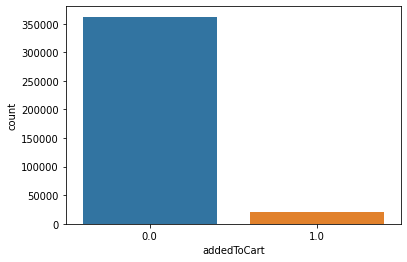

In [ ]:
#data imbalance 가 심함, 임계값 조정이 필요함
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=y_train);

In [ ]:
pipe = make_pipeline(
    # TargetEncoder: 범주형 변수 인코더로, 타겟값을 특성의 범주별로 평균내어 그 값으로 인코딩
    TargetEncoder(min_samples_leaf=1, smoothing=1), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, max_depth = 10, n_jobs=-1, random_state=1234)
)

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증 정확도:  0.9586783763745157


In [ ]:
pipe2 = make_pipeline(
    # TargetEncoder: 범주형 변수 인코더로, 타겟값을 특성의 범주별로 평균내어 그 값으로 인코딩
    TargetEncoder(min_samples_leaf=1, smoothing=1), 
    SimpleImputer(strategy='median'), 
    LogisticRegression(n_jobs=-1, random_state=1234)
)

pipe2.fit(X_train, y_train)
print('검증 정확도: ', pipe2.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증 정확도:  0.9576758805776882


In [ ]:
#pipe.score과 pipe.predict 차이 확인 위한 코드
y_pred = pipe.predict(X_val)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

검증 정확도:  0.9586783763745157


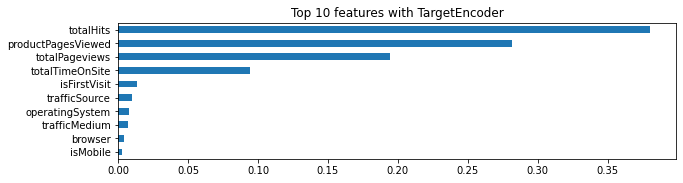

In [ ]:
# 특성 중요도(target)
rf_tar = pipe.named_steps['randomforestclassifier']
importances_tar = pd.Series(rf_tar.feature_importances_, X_train.columns)

n = 10
plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with TargetEncoder')
importances_tar.sort_values()[-n:].plot.barh();

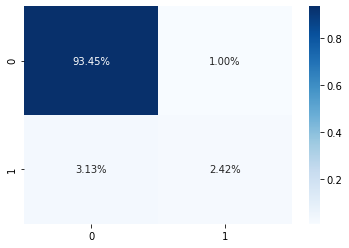

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#히트맵 퍼센트
cf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

Text(33.0, 0.5, 'Actual Label')

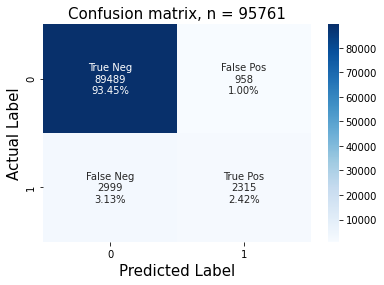

In [ ]:

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15);
plt.xlabel('Predicted Label',fontsize=15)
plt.ylabel('Actual Label',fontsize=15)

In [ ]:
print(classification_report(y_val, y_pred)) 
#1에 대한 recall을 높여야 한다

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     90447
         1.0       0.71      0.44      0.54      5314

    accuracy                           0.96     95761
   macro avg       0.84      0.71      0.76     95761
weighted avg       0.95      0.96      0.95     95761



In [ ]:
pipe.predict_proba(X_val)

array([[9.96983671e-01, 3.01632921e-03],
       [9.99855566e-01, 1.44434062e-04],
       [9.99901369e-01, 9.86306888e-05],
       ...,
       [9.89047480e-01, 1.09525200e-02],
       [9.95727882e-01, 4.27211787e-03],
       [9.99729032e-01, 2.70967961e-04]])

In [ ]:
y_pred_proba = pipe.predict_proba(X_val)[:, 1]
y_pred_proba

array([3.01632921e-03, 1.44434062e-04, 9.86306888e-05, ...,
       1.09525200e-02, 4.27211787e-03, 2.70967961e-04])

In [ ]:
y_pred_proba1 = pipe.predict_proba(X_train)[:, 1]
y_pred_proba1

array([6.45806646e-01, 1.29429580e-04, 4.83875581e-05, ...,
       1.01067744e-04, 6.91790390e-04, 1.19504041e-04])

In [ ]:
from ipywidgets import interact, fixed

threshold = 0.5 #(0.5인 이유 = 해석을 아예 못한 경우 0.5)

def explore_threshold(y_true, y_pred_proba, threshold=0.5):
    y_pred = y_pred_proba >= threshold
    vc = pd.Series(y_pred).value_counts()
    ax = sns.histplot(y_pred_proba, kde=True)
    ax.axvline(threshold, color='red')
    ax.set_title(f'# of target, 1={vc[1]}, 0={vc[0]}')
    plt.show()
    print(classification_report(y_true, y_pred))

    
interact(explore_threshold, 
    y_true=fixed(y_val), 
    y_pred_proba=fixed(y_pred_proba), 
    threshold=(0, 1, 0.01));

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [ ]:
threshold = 0.18

enc = TargetEncoder(min_samples_leaf=1, smoothing=1)
imp_mean = SimpleImputer(strategy='median')
model = RandomForestClassifier(n_estimators=100, max_depth = 10, n_jobs=-1, random_state=1234)

X_train_encoded = enc.fit_transform(X_train, y_train)
X_train_imputed = imp_mean.fit_transform(X_train_encoded)
model.fit(X_train_imputed, y_train)

X_val_encoded = enc.transform(X_val)
X_val_imputed = imp_mean.transform(X_val_encoded)

X_test_encoded = enc.transform(X_test)
X_test_imputed = imp_mean.transform(X_test_encoded)


#y_pred = model_lr.predict(X_test_scaled)


y_pred = (model.predict_proba(X_val_imputed)[:, 1] > threshold).astype('float')
cf_matrix1 = confusion_matrix(y_val, y_pred)
cf_matrix1

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


array([[84526,  5921],
       [  498,  4816]])

Text(33.0, 0.5, 'Actual Label')

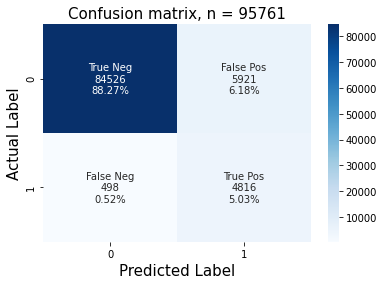

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix1.flatten()]

group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix1.flatten()/np.sum(cf_matrix1)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix1, annot=labels, fmt='', cmap='Blues')
plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15);
plt.xlabel('Predicted Label',fontsize=15)
plt.ylabel('Actual Label',fontsize=15)

In [ ]:
from sklearn.metrics import roc_curve

# roc_curve(타겟값, prob of 1)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPRate(Recall)': tpr, 
    'Threshold': thresholds
})
roc

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,1.920089
1,0.000000,0.000188,0.920089
2,0.000000,0.010915,0.905329
3,0.000011,0.010915,0.905306
4,0.000011,0.012044,0.903811
...,...,...,...
12815,0.942287,1.000000,0.000015
12816,0.942309,1.000000,0.000011
12817,0.999923,1.000000,0.000010
12818,0.999967,1.000000,0.000010


In [ ]:
fpr1, tpr1, thresholds1 = roc_curve(y_train, y_pred_proba1)

roc1 = pd.DataFrame({
    'FPR(Fall-out)': fpr1, 
    'TPRate(Recall)': tpr1, 
    'Threshold': thresholds1
})
roc1

,FPR(Fall-out),TPRate(Recall),Threshold
0,0.000000,0.000000,1.923521
1,0.000000,0.000048,0.923521
2,0.000000,0.002106,0.913077
3,0.000000,0.002201,0.913071
4,0.000000,0.003158,0.911509
...,...,...,...
44709,0.942162,1.000000,0.000011
44710,0.999920,1.000000,0.000010
44711,0.999967,1.000000,0.000010
44712,0.999978,1.000000,0.000009


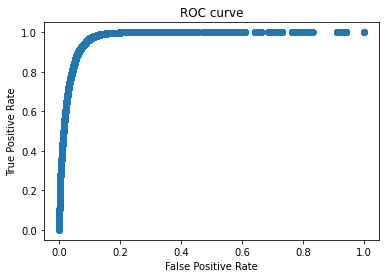

In [ ]:
plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

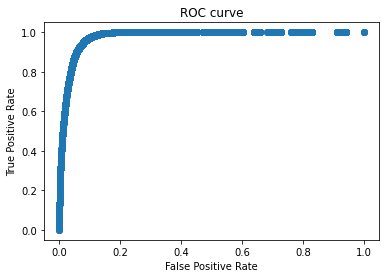

In [ ]:
plt.scatter(fpr1, tpr1)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [ ]:
# threshold 최대값의 인덱스, np.argmax()
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

idx: 5386 , threshold: 0.06013330389386193


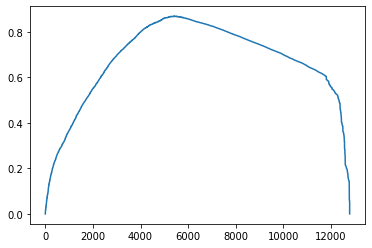

In [ ]:
plt.plot(tpr-fpr);

In [ ]:
y_pred_optimal = y_pred_proba >= optimal_threshold
print(classification_report(y_val, y_pred_optimal))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95     90447
         1.0       0.36      0.97      0.53      5314

    accuracy                           0.90     95761
   macro avg       0.68      0.93      0.74     95761
weighted avg       0.96      0.90      0.92     95761



In [ ]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_val, y_pred_proba)
auc_score

0.9753106220703804

In [ ]:
pipe

Pipeline(memory=None,
         steps=[('targetencoder',
                 TargetEncoder(cols=['trafficSource'], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               min_samples_leaf=1, return_df=True,
                               smoothing=1.0, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('randomforestc...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=10, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                              

In [ ]:
pipe = make_pipeline(
    # TargetEncoder: 범주형 변수 인코더로, 타겟값을 특성의 범주별로 평균내어 그 값으로 인코딩
    TargetEncoder(min_samples_leaf=1, smoothing=1), 
    SimpleImputer(strategy='median'), 
    #RandomForestClassifier(n_estimators=100, max_depth = 10, n_jobs=-1, random_state=1234)
)
X_train3 = pipe.fit_transform(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
param_list ={'n_estimators': [90,100,110],
             'max_depth':[8,10,12],
             'max_features':[0.05,0.15,0.2]
}

rf = RandomForestClassifier(n_estimators=100, max_depth = 10, n_jobs=-1, random_state=1234)
grid_cv = GridSearchCV(rf, param_grid=param_list, n_jobs=-1)
grid_cv.fit(X_train3, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random

In [ ]:
print('best parameters : \n', grid_cv.best_params_)

best parameters : 
 {'max_depth': 12, 'max_features': 0.2, 'n_estimators': 100}


In [ ]:
param_list ={'n_estimators': [100],
             'max_depth':[12,14],
             'max_features':[0.2,0.3]
}

rf = RandomForestClassifier(n_estimators=100, max_depth = 10, n_jobs=-1, random_state=1234)
grid_cv = GridSearchCV(rf, param_grid=param_list, n_jobs=-1)
grid_cv.fit(X_train3, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random

In [ ]:
print('best parameters : \n', grid_cv.best_params_)

best parameters : 
 {'max_depth': 14, 'max_features': 0.3, 'n_estimators': 100}


In [ ]:
param_list ={'n_estimators': [100],
             'max_depth':[14,18],
             'max_features':[0.3,0.6]
}

rf = RandomForestClassifier(n_estimators=100, max_depth = 10, n_jobs=-1, random_state=1234)
grid_cv = GridSearchCV(rf, param_grid=param_list, n_jobs=-1)
grid_cv.fit(X_train3, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random

In [ ]:
print('best parameters : \n', grid_cv.best_params_) 
#'max_depth': 13(12~14), 'max_features': 0.3(0.3~0.5), 'n_estimators': 100

best parameters : 
 {'max_depth': 14, 'max_features': 0.6, 'n_estimators': 100}


In [ ]:
!pip install shapely
!pip install git+https://github.com/slundberg/shap.git

  Cloning https://github.com/slundberg/shap.git to /tmp/pip-req-build-891kjsb_
  Running command git clone -q https://github.com/slundberg/shap.git /tmp/pip-req-build-891kjsb_
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=3084170 sha256=f6da633782c3901e74c56fa013de58b0acc28395f1547480f367d5acf86174b8
  Stored in directory: /tmp/pip-ephem-wheel-cache-55l2fifw/wheels/2b/50/ba/b1868152380d067a5c83623f5d6244d4dabe5ad45e8f885437
Successfully built shap
